# IMPORT DATASET AND NECESSARY LIBRARY

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
df=pd.read_csv("/content/IMDb Movies India.csv",encoding='ISO-8859-1')
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


# EXPLORATORY DATA ANALYSIS

In [26]:
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [28]:
df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


# DATA PREPROCESSING

In [29]:
df['Year']=df['Year'].str.strip('-')


In [30]:
df['Year']

0           NaN
1        (2019)
2        (2021)
3        (2019)
4        (2010)
          ...  
15504    (1988)
15505    (1999)
15506    (2005)
15507    (1988)
15508    (1998)
Name: Year, Length: 15509, dtype: object

In [31]:
df['Year'].str.split(pat='(')

0              NaN
1        [, 2019)]
2        [, 2021)]
3        [, 2019)]
4        [, 2010)]
           ...    
15504    [, 1988)]
15505    [, 1999)]
15506    [, 2005)]
15507    [, 1988)]
15508    [, 1998)]
Name: Year, Length: 15509, dtype: object

In [32]:
df['YEAR']=df['Year'].str.split(pat='(').str[1]


In [33]:
df['YEAR']=df['YEAR'].str.strip(')')

In [34]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,YEAR
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia,NaN
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,2019
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana,2021
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,2019
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali,2010


In [35]:
df=df.drop('Year',axis=1)

In [36]:
df.dtypes

Name         object
Duration     object
Genre        object
Rating      float64
Votes        object
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
YEAR         object
dtype: object

In [37]:
df['YEAR'] = df['YEAR'].fillna(-1)
# Convert the 'Year' column to integer
df['YEAR'] = df['YEAR'].astype('int')

# Display the data types of the DataFrame after conversion
print(df.dtypes)

Name         object
Duration     object
Genre        object
Rating      float64
Votes        object
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
YEAR          int64
dtype: object


In [38]:
# Calculate the mean year excluding the placeholder value (-1)
mean_year = df[df['YEAR'] != -1]['YEAR'].mean()

# Replace the placeholder value (-1) with the calculated mean
df['YEAR'] = df['YEAR'].replace(-1, mean_year)

# Convert the 'YEAR' column to integer
df['YEAR'] = df['YEAR'].astype('int')

# Display the data types of the DataFrame after conversion
print(df.dtypes)


Name         object
Duration     object
Genre        object
Rating      float64
Votes        object
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
YEAR          int64
dtype: object


In [39]:
df.isnull().sum()

Name           0
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
YEAR           0
dtype: int64

In [40]:
df.dtypes

Name         object
Duration     object
Genre        object
Rating      float64
Votes        object
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
YEAR          int64
dtype: object

In [41]:
df.isnull().sum()

Name           0
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
YEAR           0
dtype: int64

In [43]:
# Fill missing values in the columns with their mode value
mode_value = df['Actor 1'].mode()[0]  # Get the first mode value
df['Actor 1'] = df['Actor 1'].fillna(mode_value)

mode_value = df['Actor 2'].mode()[0]  # Get the first mode value
df['Actor 2'] = df['Actor 2'].fillna(mode_value)

mode_value = df['Actor 3'].mode()[0]  # Get the first mode value
df['Actor 3'] = df['Actor 3'].fillna(mode_value)

mode_value = df['Director'].mode()[0]  # Get the first mode value
df['Director'] = df['Director'].fillna(mode_value)

mode_value = df['Genre'].mode()[0]  # Get the first mode value
df['Genre'] = df['Genre'].fillna(mode_value)

df['Rating']=df['Rating'].fillna(df['Rating'].mean())

mode_value = df['Votes'].mode()[0]  # Get the first mode value
df['Votes'] = df['Votes'].fillna(mode_value)

mode_value = df['Duration'].mode()[0]  # Get the first mode value
df['Duration'] = df['Duration'].fillna(mode_value)

In [44]:

df.isnull().sum()

Name        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
YEAR        0
dtype: int64

In [45]:
df.duplicated().sum()

6

In [46]:
# Remove duplicate rows from the DataFrame
df.drop_duplicates(inplace=True)

In [47]:
df.duplicated().sum()

0

In [48]:
df.columns

Index(['Name', 'Duration', 'Genre', 'Rating', 'Votes', 'Director', 'Actor 1',
       'Actor 2', 'Actor 3', 'YEAR'],
      dtype='object')

In [49]:
#Drop irrelevent columns that are notuse in prediction
df.drop(['Name', 'Duration', 'Votes'], axis=1, inplace=True)


In [50]:
df.head()

,Genre,Rating,Director,Actor 1,Actor 2,Actor 3,YEAR
0,Drama,5.841621,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia,1987
1,Drama,7.000000,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,2019
2,"Drama, Musical",5.841621,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana,2021
3,"Comedy, Romance",4.400000,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,2019
4,Drama,5.841621,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali,2010


In [51]:
df.columns

Index(['Genre', 'Rating', 'Director', 'Actor 1', 'Actor 2', 'Actor 3', 'YEAR'], dtype='object')

# VISUALIZATION

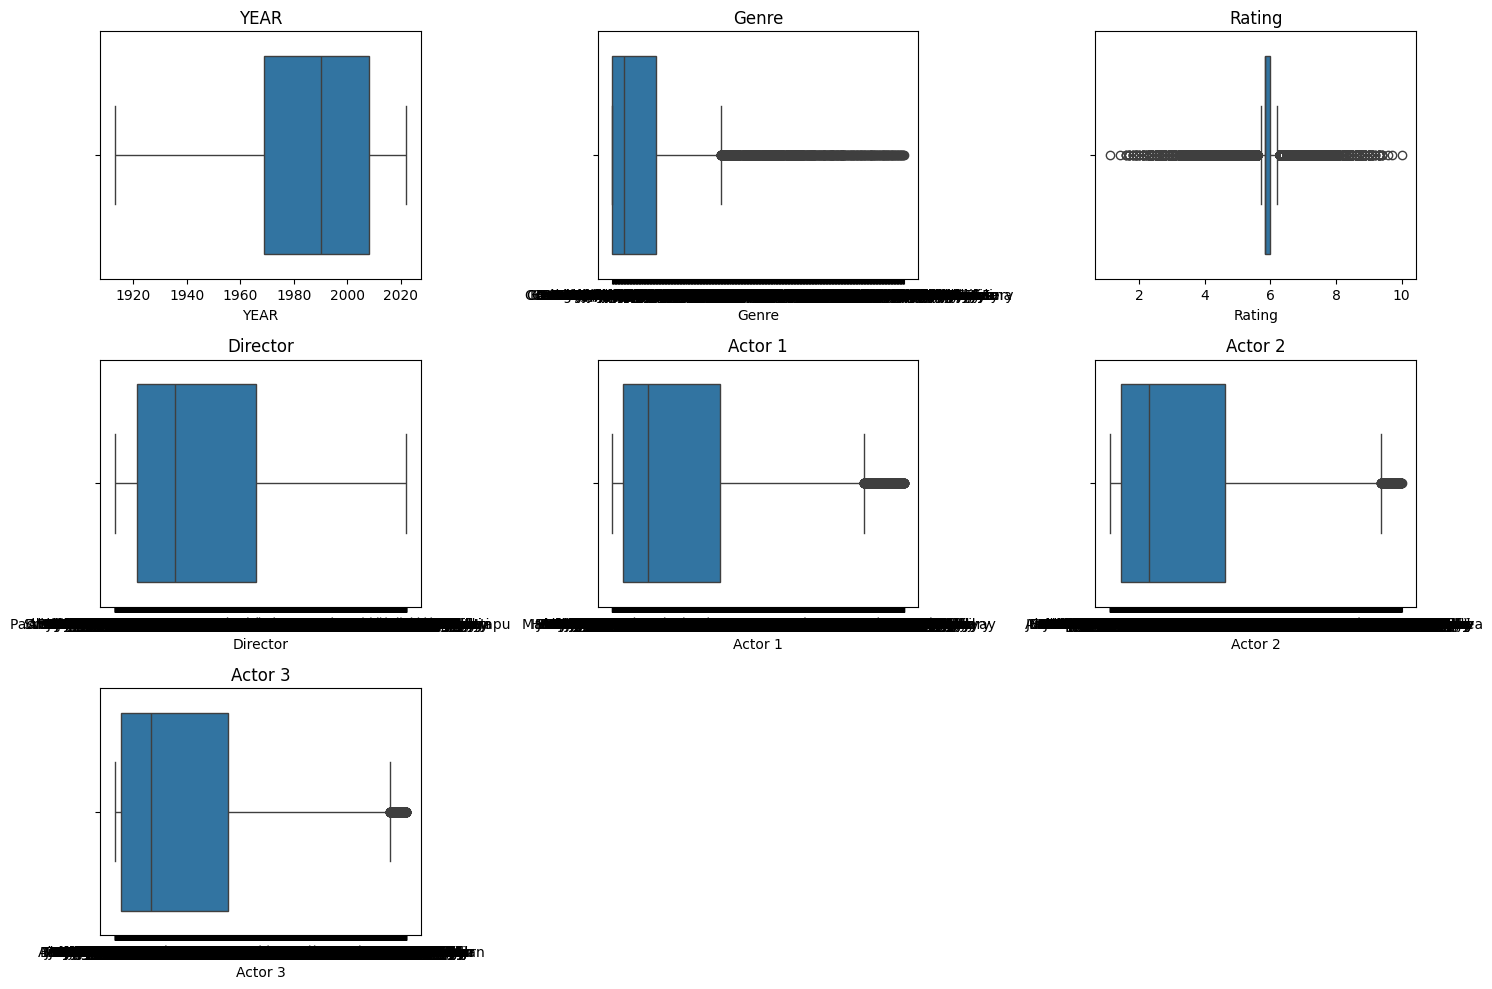

In [52]:
columns = ['YEAR', 'Genre', 'Rating', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']
plt.figure(figsize=(15, 10))
for i, column in enumerate(columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[column])
    plt.title(column)

plt.tight_layout()
plt.show()

In [54]:

# Function to remove outliers using IQR from Genre or Rating column
def remove_outliers(df, column):
    if df[column].dtype in ['int64', 'float64']:
        # For numeric columns
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3 - q1

        # Calculate the lower and upper bounds for outliers
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        # Remove outliers
        df_cleaned = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    else:
        # For non-numeric columns, return the original DataFrame
        df_cleaned = df.copy()

    return df_cleaned

# Remove outliers from the 'Genre' column
df_cleaned_genre = remove_outliers(df, 'Genre')

# Remove outliers from the 'Rating' column
df_cleaned_rating = remove_outliers(df, 'Rating')

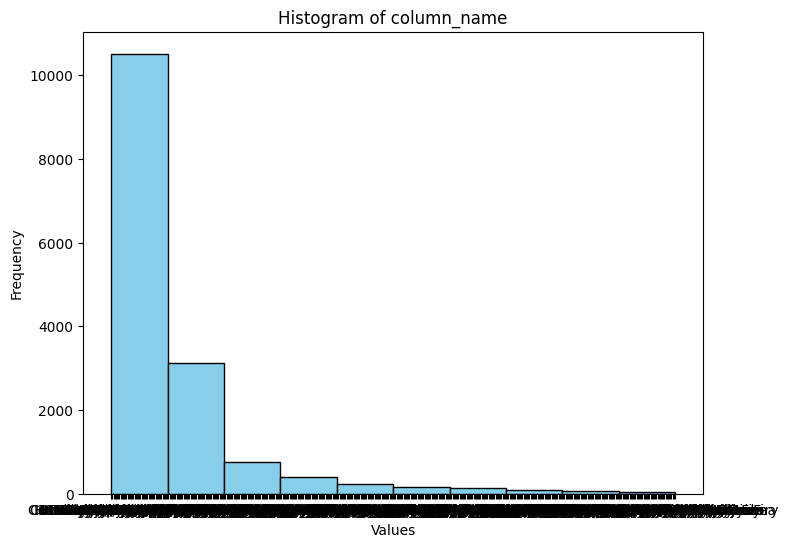

In [57]:
 #Create a histogram using histplot
plt.figure(figsize=(8, 6))
plt.hist(df['Genre'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of column_name')
plt.show()

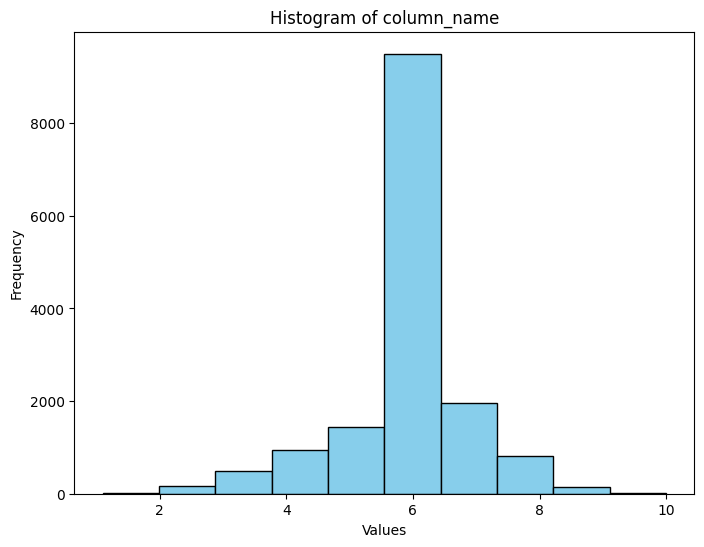

In [58]:
#Create a histogram using histplot
plt.figure(figsize=(8, 6))
plt.hist(df['Rating'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of column_name')
plt.show()

# ##PREDICTION

In [61]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming your data is stored in a DataFrame called 'df'
# Replace 'df' with the actual name of your DataFrame

# Extract the features and target variable
X = df[['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3', 'YEAR']]
y = df['Rating']

# Convert categorical variables to numerical using one-hot encoding
X = pd.get_dummies(X, columns=['Genre'])

# Drop non-numeric columns
X = X.select_dtypes(exclude=['object'])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Regression Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Calculate evaluation metrics for Random Forest Regression
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
r2_rf = r2_score(y_test, y_pred_rf)

# Print evaluation metrics for Random Forest Regression
print("\nRandom Forest Regression Metrics:")
print("Mean Absolute Error (MAE):", mae_rf)
print("Mean Squared Error (MSE):", mse_rf)
print("Root Mean Squared Error (RMSE):", rmse_rf)
print("R-squared (R2) Score:", r2_rf)


Random Forest Regression Metrics:
Mean Absolute Error (MAE): 0.6465970265804866
Mean Squared Error (MSE): 0.950149680673322
Root Mean Squared Error (RMSE): 0.9747562160218943
R-squared (R2) Score: 0.025397741977272625
